# Exercise 4 Solution: Statistical Tests for Correlation

In this exercise, we analyze the correlation between two neuroscience-related variables: **Theta power** (X) and **Memory scores** (Y). To evaluate the strength and reliability of this relationship, we'll calculate Pearson's correlation coefficient and use statistical testing methods to confirm its significance.

Specifically, we will:
1. **Compute the Observed Correlation**: Calculate Pearson’s correlation coefficient for the given dataset to quantify the linear relationship between Theta power and Memory scores.
2. **Permutation Test**: Perform a permutation test to assess the likelihood of observing this correlation by chance. We will shuffle one of the variables multiple times, compute the correlation each time, and observe how often we achieve correlations as extreme as our observed value.
3. **Bootstrap Confidence Interval**: Use bootstrapping to obtain a 95% confidence interval for the correlation coefficient. This method involves resampling our data with replacement to simulate potential outcomes and build a distribution around our observed correlation.

By the end of this exercise, we will have a robust understanding of the relationship between these variables and the statistical certainty of our observed correlation.


In [9]:
import numpy as np
from scipy.stats import pearsonr, entropy
import matplotlib.pyplot as plt

In [10]:
# Given data for X (Theta power) and Y (Memory scores)
X = np.array([0.75, 0.80, 0.85, 0.70, 0.60, 0.95, 0.90])
Y = np.array([82, 88, 85, 76, 74, 90, 89])

## Q.1: Calculate the Observed Correlation

In [11]:
observed_r, _ = pearsonr(X, Y)
print("Observed Pearson's correlation coefficient (r):", observed_r)


Observed Pearson's correlation coefficient (r): 0.9377151832816053


## Q.2: Permutation Test

In [12]:
np.random.seed(42)
n_permutations = 1000
perm_r_values = []

for _ in range(n_permutations):
    Y_permuted = np.random.permutation(Y)
    perm_r, _ = pearsonr(X, Y_permuted)
    perm_r_values.append(perm_r)

# Calculate p-value for permutation test
perm_r_values = np.array(perm_r_values)
p_value = np.mean(np.abs(perm_r_values) >= np.abs(observed_r))
print("Permutation Test p-value:", p_value)

Permutation Test p-value: 0.002


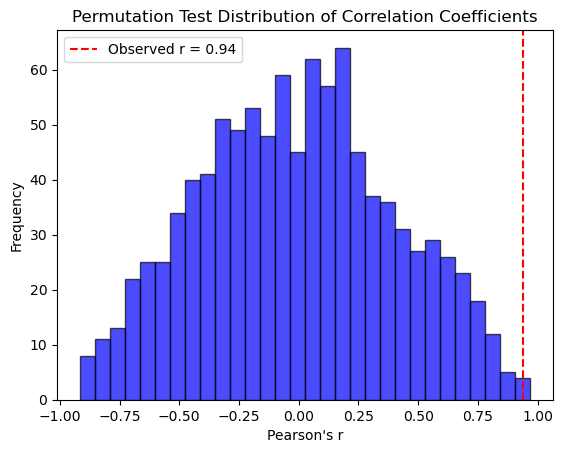

In [13]:
# Plotting permutation distribution
plt.hist(perm_r_values, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(observed_r, color='red', linestyle='--', label=f'Observed r = {observed_r:.2f}')
plt.title("Permutation Test Distribution of Correlation Coefficients")
plt.xlabel("Pearson's r")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Q.3: Bootstrapping for Confidence Interval

In [14]:
n_bootstraps = 1000
bootstrap_r_values = []

np.random.seed(42)
for _ in range(n_bootstraps):
    indices = np.random.choice(len(X), len(X), replace=True)
    X_sample = X[indices]
    Y_sample = Y[indices]
    bootstrap_r, _ = pearsonr(X_sample, Y_sample)
    bootstrap_r_values.append(bootstrap_r)

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_r_values, 2.5)
upper_bound = np.percentile(bootstrap_r_values, 97.5)
print("Bootstrap 95% Confidence Interval for r:", (lower_bound, upper_bound))

Bootstrap 95% Confidence Interval for r: (0.7116706401450495, 0.9971278122381132)


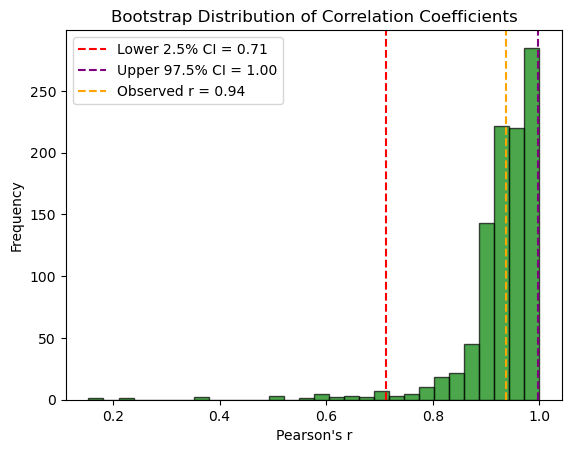

In [15]:
# Plotting bootstrap distribution
plt.hist(bootstrap_r_values, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower 2.5% CI = {lower_bound:.2f}')
plt.axvline(upper_bound, color='purple', linestyle='--', label=f'Upper 97.5% CI = {upper_bound:.2f}')
plt.axvline(observed_r, color='orange', linestyle='--', label=f'Observed r = {observed_r:.2f}')
plt.title("Bootstrap Distribution of Correlation Coefficients")
plt.xlabel("Pearson's r")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The significant p-value and high confidence interval support a robust positive correlation between hippocampal theta power and memory performance, suggesting that higher theta activity may relate to better memory recall.